<a href="https://colab.research.google.com/github/fcanessa2/Fernanda-Canessa/blob/master/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!apt install libspatialindex-dev
!pip install shapely geopandas rtree
!pip install descartes

import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


,ID,AREA,AREA1,PERIMETER,COMUNAS_,COMUNAS_ID,COMUNA,ZONA,ZONA_TS,geometry
0,1,134.027023,1.339598e+08,55150.497397,2,5,LAMPA,NaN,None,"POLYGON ((-70.930282000004 -33.37751800000068,..."
1,2,41.810143,4.178323e+07,34335.723421,3,17,COLINA,NaN,None,POLYGON ((-70.73141500000224 -33.2967820000007...
2,3,80.949127,8.089035e+07,41063.545497,4,4,LO BARNECHEA,1.0,Zona C,POLYGON ((-70.59423200000144 -33.2986180000007...
3,8,66.062439,6.601481e+07,43589.076799,9,11,LAS CONDES,1.0,Zona C,POLYGON ((-70.45721300000089 -33.3705970000007...
4,21,38.376225,3.834988e+07,26238.244556,22,24,PENALOLEN,2.0,Zona D,POLYGON ((-70.50174500000107 -33.4599700000008...


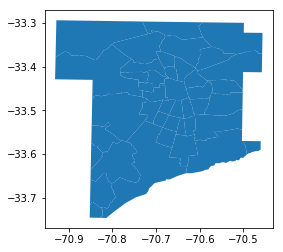

In [7]:
#MISION 1

zones = (gpd.read_file("zonas.shp", crs = {"init" : "epsg:4326"}))
display(zones.head(5))
zones.plot()

,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,geometry
0,915,L-13-63-5-NS,PI317,MAIP�,MAIP�,CALETERA CAMINO A MELIPILLA,LAGO BRACCIANO,Central Poniente / esq. Lago Bracciano,333352.21,6285793.36,0,NaN,None,27.5,2482.0,31.67,2921.67,6,111I;113R;113eR;113cR;350R;I11R,POINT (-70.795134 -33.554516)
1,916,L-13-63-10-PO,PI307,MAIP�,MAIP�,LAS ARALIAS,LAGO DE COMO,Central Poniente / esq. Lago de Como,333556.96,6285602.35,0,NaN,None,27.5,2482.0,31.67,2921.67,6,111I;113R;113eR;113cR;350R;I11R,POINT (-70.792965 -33.55627)
2,927,L-13-61-10-OP,PI269,MAIP�,MAIP�,LIQUIDAMBAR 4,LAGO DE COMO,Central Oriente / esq. Lago de Como,333620.37,6285624.74,0,NaN,None,35.0,3264.0,22.67,2008.33,6,111R;113I;113eI;113cI;350I;I11I,POINT (-70.792278 -33.556078)
3,918,L-13-63-20-PO,PI309,MAIP�,MAIP�,EL CACTUS,LAGO CASTELGANDOLFO,Central Poniente / esq. Castelgandolfo,334004.86,6285199.22,0,NaN,None,27.5,2482.0,31.67,2921.67,6,111I;113R;113eR;113cR;350R;I11R,POINT (-70.788217 -33.559974)
4,925,L-13-61-20-OP,PI267,MAIP�,MAIP�,EL HELECHO NORTE,LAGO CASTELGANDOLFO,Central Oriente / esq. Castelgandolfo,334032.79,6285254.39,0,NaN,None,35.0,3264.0,22.67,2008.33,6,111R;113I;113eI;113cI;350I;I11I,POINT (-70.78790600000001 -33.559481)


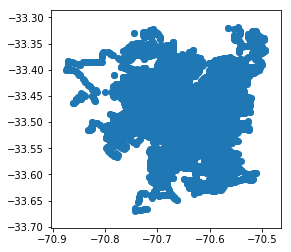

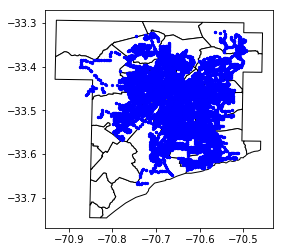

In [18]:
# MISION 2

paradas = (gpd.read_file("paradas.shp", crs = {"init" : "epsg:4326"}))
display(paradas.head(5))
paradas.plot()

##http://geopandas.org/mapping.html
fig, ax = plt.subplots()
ax.set_aspect('equal')
zones.plot(ax=ax, color='white', edgecolor='black')
paradas.plot(ax=ax, marker='o', color='blue', markersize=5)
plt.show()


,ID_left,CODINFRA,SIMT,COMUNA_left,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,geometry,index_right,ID_right,AREA,AREA1,PERIMETER,COMUNAS_,COMUNAS_ID,COMUNA_right,ZONA,ZONA_TS
0,915,L-13-63-5-NS,PI317,MAIP�,MAIP�,CALETERA CAMINO A MELIPILLA,LAGO BRACCIANO,Central Poniente / esq. Lago Bracciano,333352.21,6285793.36,0,NaN,None,27.5,2482.0,31.67,2921.67,6,111I;113R;113eR;113cR;350R;I11R,POINT (-70.795134 -33.554516),14,22,103.516258,1.034635e+08,48160.239883,23,25,MAIPU,6.0,Zona I
1,916,L-13-63-10-PO,PI307,MAIP�,MAIP�,LAS ARALIAS,LAGO DE COMO,Central Poniente / esq. Lago de Como,333556.96,6285602.35,0,NaN,None,27.5,2482.0,31.67,2921.67,6,111I;113R;113eR;113cR;350R;I11R,POINT (-70.792965 -33.55627),14,22,103.516258,1.034635e+08,48160.239883,23,25,MAIPU,6.0,Zona I
2,927,L-13-61-10-OP,PI269,MAIP�,MAIP�,LIQUIDAMBAR 4,LAGO DE COMO,Central Oriente / esq. Lago de Como,333620.37,6285624.74,0,NaN,None,35.0,3264.0,22.67,2008.33,6,111R;113I;113eI;113cI;350I;I11I,POINT (-70.792278 -33.556078),14,22,103.516258,1.034635e+08,48160.239883,23,25,MAIPU,6.0,Zona I
3,918,L-13-63-20-PO,PI309,MAIP�,MAIP�,EL CACTUS,LAGO CASTELGANDOLFO,Central Poniente / esq. Castelgandolfo,334004.86,6285199.22,0,NaN,None,27.5,2482.0,31.67,2921.67,6,111I;113R;113eR;113cR;350R;I11R,POINT (-70.788217 -33.559974),14,22,103.516258,1.034635e+08,48160.239883,23,25,MAIPU,6.0,Zona I
4,925,L-13-61-20-OP,PI267,MAIP�,MAIP�,EL HELECHO NORTE,LAGO CASTELGANDOLFO,Central Oriente / esq. Castelgandolfo,334032.79,6285254.39,0,NaN,None,35.0,3264.0,22.67,2008.33,6,111R;113I;113eI;113cI;350I;I11I,POINT (-70.78790600000001 -33.559481),14,22,103.516258,1.034635e+08,48160.239883,23,25,MAIPU,6.0,Zona I


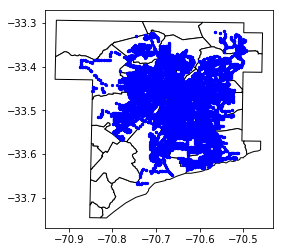

In [17]:
# MISION 3

paradasdentro = gpd.sjoin(paradas, zones, op='within', how='inner')

display(paradasdentro.head(5))

##http://geopandas.org/mapping.html
fig, ax = plt.subplots()
ax.set_aspect('equal')
zones.plot(ax=ax, color='white', edgecolor='black')
paradasdentro.plot(ax=ax, marker='o', color='blue', markersize=5)
plt.show()


In [24]:
# MISION 4

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('emisiones1s.csv', sep=',')
df.head(5)

def mision4(line_code, direction):
    df1 =df.loc[(df["direction"]==direction) & (df["line_code"]==line_code)]   
    return df1

display(mision4("C01", "I"))





,measurement_id,expedition_id,dispatch_time,line_id,line_code,direction,bus_id,license_plate,bus_capacity,gps_time,latitude,longitude,distance_kms,total_kms,measurement_speed,instant_speed
0,5b70f54f1582e20b2cc761cd,5b70f54f1582e2193cdcaa35,2018-08-13 00:03:50,528e24f2e031881a683a19a7,C01,I,57851829602646250c2dfece,FZJL-82,102.0,2018-08-13 00:04:20,-33.429737,-70.582596,0.392273,19.695000,33.716346,58.0
1,5b70f56f1582e20b2cc76313,5b70f54f1582e2193cdcaa35,2018-08-13 00:03:50,528e24f2e031881a683a19a7,C01,I,57851829602646250c2dfece,FZJL-82,102.0,2018-08-13 00:04:50,-33.427490,-70.578835,0.835126,19.695000,53.142367,48.9
2,5b70f59b1582e20b2cc76462,5b70f54f1582e2193cdcaa35,2018-08-13 00:03:50,528e24f2e031881a683a19a7,C01,I,57851829602646250c2dfece,FZJL-82,102.0,2018-08-13 00:05:20,-33.425098,-70.577423,1.209589,19.695000,44.935542,45.9
3,5b70f5bb1582e20b2cc765a2,5b70f54f1582e2193cdcaa35,2018-08-13 00:03:50,528e24f2e031881a683a19a7,C01,I,57851829602646250c2dfece,FZJL-82,102.0,2018-08-13 00:05:50,-33.422386,-70.579735,1.635392,19.695000,51.096369,48.9
4,5b70f5de1582e20b2cc766ee,5b70f54f1582e2193cdcaa35,2018-08-13 00:03:50,528e24f2e031881a683a19a7,C01,I,57851829602646250c2dfece,FZJL-82,102.0,2018-08-13 00:06:20,-33.419044,-70.582146,2.135714,19.695000,60.038632,21.9
5,5b70f6001582e20b2cc76839,5b70f54f1582e2193cdcaa35,2018-08-13 00:03:50,528e24f2e031881a683a19a7,C01,I,57851829602646250c2dfece,FZJL-82,102.0,2018-08-13 00:07:20,-33.415791,-70.583199,2.557436,19.695000,25.303346,29.8
6,5b70f62d1582e20b2cc76988,5b70f54f1582e2193cdcaa35,2018-08-13 00:03:50,528e24f2e031881a683a19a7,C01,I,57851829602646250c2dfece,FZJL-82,102.0,2018-08-13 00:07:50,-33.414009,-70.583260,2.801881,19.695000,29.333315,15.9
7,5b70f64c1582e20b2cc76adb,5b70f54f1582e2193cdcaa35,2018-08-13 00:03:50,528e24f2e031881a683a19a7,C01,I,57851829602646250c2dfece,FZJL-82,102.0,2018-08-13 00:08:20,-33.413261,-70.581970,2.959044,19.695000,18.859654,18.9
8,5b70f6b01582e20b2cc76c46,5b70f54f1582e2193cdcaa35,2018-08-13 00:03:50,528e24f2e031881a683a19a7,C01,I,57851829602646250c2dfece,FZJL-82,102.0,2018-08-13 00:10:20,-33.410320,-70.572464,3.902968,19.695000,28.317695,10.9
9,5b70f6d21582e20b2cc76da3,5b70f54f1582e2193cdcaa35,2018-08-13 00:03:50,528e24f2e031881a683a19a7,C01,I,57851829602646250c2dfece,FZJL-82,102.0,2018-08-13 00:10:50,-33.410316,-70.572433,3.906129,19.695000,0.379371,0.0


             measurement_id  ...                                      geometry
0  5b70f54f1582e20b2cc761cd  ...   POINT (-70.5825958251953 -33.4297370910645)
1  5b70f56f1582e20b2cc76313  ...   POINT (-70.57883453369141 -33.427490234375)
2  5b70f59b1582e20b2cc76462  ...   POINT (-70.5774230957031 -33.4250984191895)
3  5b70f5bb1582e20b2cc765a2  ...  POINT (-70.57973480224609 -33.4223861694336)
4  5b70f5de1582e20b2cc766ee  ...    POINT (-70.582145690918 -33.4190444946289)

[5 rows x 17 columns]


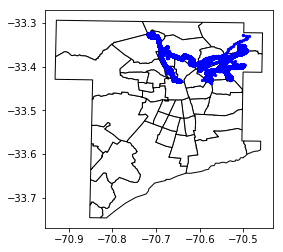

In [26]:
# MISION 5
#https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

fig, ax = plt.subplots()
ax.set_aspect('equal')
zones.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='blue', markersize=5)
plt.show()
